# Import Necessary Libraries

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

# Read Training-Set into a DataFrame

In [2]:
test_df = pd.read_csv('kc_house_data_test_features.csv')
train_df = pd.read_csv('kc_house_data_train.csv')

In [3]:
test_df['age'] = 2020 - test_df['yr_built']
train_df['age'] = 2020 - train_df['yr_built']

- Making the date column a date-time object

In [4]:
list_of_dates_train = [(date[:4]+"-"+date[4:6]+"-"+date[6:8]) for date in train_df['date']]
list_of_dates_test = [(date[:4]+"-"+date[4:6]+"-"+date[6:8]) for date in test_df['date']]

In [5]:
train_df['date'] = [datetime.strptime(list_of_dates_train[date], '%Y-%m-%d') for date in range(len(train_df['date']))]
test_df['date'] = [datetime.strptime(list_of_dates_test[date], '%Y-%m-%d') for date in range(len(test_df['date']))]

- Remove erroneous values in bedroom column

In [6]:
train_df['bedrooms'].value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [7]:
train_df.loc[8597,'bedrooms'] = 3
train_df.loc[8597,'bedrooms']

3

In [8]:
train_df.shape

(17290, 23)

In [9]:
test_df.shape

(4323, 22)

In [10]:
test_df.head()

,Unnamed: 0,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,0,1974300020,2014-08-27,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918,53
1,1,1974300020,2015-02-18,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918,53
2,2,3630020380,2014-11-07,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576,15
3,3,1771000290,2014-12-03,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565,44
4,4,5126310470,2015-01-15,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916,15


In [11]:
train_df['bathrooms'].value_counts()

2.50    4322
1.00    3100
1.75    2431
2.25    1666
2.00    1549
1.50    1168
2.75     896
3.00     592
3.50     591
3.25     455
3.75     135
4.00     107
4.50      76
4.25      64
0.75      52
5.00      17
4.75      16
5.25      11
0.00       8
5.50       7
1.25       6
6.00       6
5.75       3
0.50       3
8.00       2
6.75       2
6.25       2
7.50       1
6.50       1
7.75       1
Name: bathrooms, dtype: int64

In [12]:
for i in train_df[train_df['bathrooms'] == 0].index:
    train_df.drop(i, inplace=True)

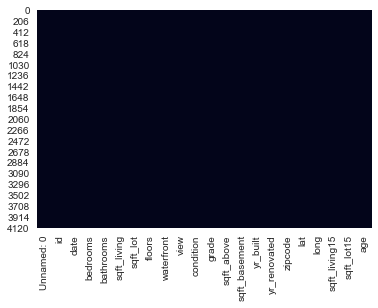

In [13]:
sns.heatmap(test_df.isnull(), cbar=False)

In [14]:
train_df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,34
1,1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,43
2,2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,23
3,3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,30
4,4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,16


In [15]:
train_df.drop('Unnamed: 0', inplace=True, axis=1)
test_df.drop('Unnamed: 0', inplace=True, axis=1)

In [16]:
train_df['year_sold'] = [date.year for date in train_df['date']]
test_df['year_sold'] = [date.year for date in test_df['date']]

In [17]:
train_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'year_sold'],
      dtype='object')

In [18]:
test_df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age', 'year_sold'],
      dtype='object')

# Test-Train Split
- Beginning of SKLearn

In [28]:
X = train_df[['bathrooms', 'bedrooms', 'year_sold', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
y = train_df[['price']]
#X_test = test_df[['bathrooms', 'bedrooms', 'year_sold', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#features = ['bathrooms', 'bedrooms', 'year_sold', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

#instantiate this class
poly_2 = PolynomialFeatures(degree=2, interaction_only=False)
#fit and transform the data and create a  new dataframe
X_train_df_poly = pd.DataFrame(poly_2.fit_transform(X_train), columns=poly_2.get_feature_names(X_train.columns))
X_test_df_poly = pd.DataFrame(poly_2.transform(X_test), columns=poly_2.get_feature_names(X_test.columns))

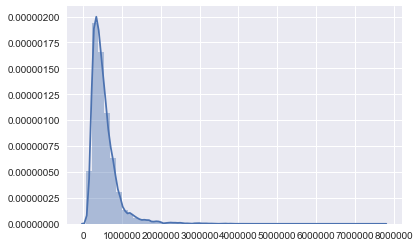

In [25]:
sns.distplot(y_train)

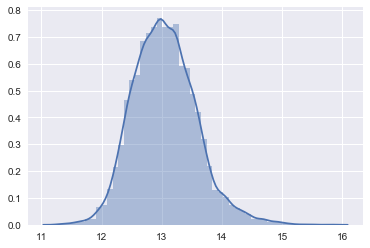

In [26]:
log_y = np.log(y_train)
sns.distplot(log_y)

In [20]:
scale = StandardScaler()
#transformed_train = scale.fit_transform(X_train)
#X_train = pd.DataFrame(transformed_train, columns = X_train.columns)
#transformed_test = scale.transform(X_test)
#X_test = pd.DataFrame(transformed_test, columns = X_train.columns)
transformed_train = scale.fit_transform(X_train_df_poly)
X_train_transformed = pd.DataFrame(transformed_train, columns = X_train_df_poly.columns)
transformed_test = scale.transform(X_test_df_poly)
X_test_transformed = pd.DataFrame(transformed_test, columns = X_test_df_poly.columns)

In [21]:
lasso = Lasso(alpha=0.1, normalize=False)
lasso.fit(X_train_df_poly,y_train)
y_train_pred = lasso.predict(X_train_df_poly)
y_test_pred = lasso.predict(X_test_df_poly)
#train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
#print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(train_rmse) )

#lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
#lasso_coef01.columns = X_train.columns
#lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
#lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

Testing Error: 205350.8981906743


/Users/sullivanmyer/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364383766025149.44, tolerance: 240810706105.06155
  positive)


In [22]:
reg = linear_model.BayesianRidge()
reg.fit(X_train_transformed, y_train)

/Users/sullivanmyer/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [23]:
y_pred_bayes = reg.predict(X_test_transformed)

In [24]:
bayes_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_bayes))
print(bayes_rmse)
bayes_rmse_std = bayes_rmse/y_train.std()
print(bayes_rmse_std)

ValueError: Found input variables with inconsistent numbers of samples: [17282, 4323]

In [ ]:
features = ['bathrooms', 'bedrooms', 'year_sold', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
#instantiate this class
poly_2 = PolynomialFeatures(degree=2, interaction_only=False)
#fit and transform the data and create a  new dataframe
df_poly = pd.DataFrame(poly_2.fit_transform(X), columns=poly_2.get_feature_names(X.columns))
df_poly.head()

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(df_poly, y, test_size=0.2, random_state=0)

In [ ]:
scale = StandardScaler()
transformed_train = scale.fit_transform(X_train)
X_train = pd.DataFrame(transformed_train, columns = X_train.columns)
transformed_test = scale.transform(X_test)
X_test = pd.DataFrame(transformed_test, columns = X_train.columns)

In [ ]:
lasso = Lasso(alpha=0.01, normalize=False, max_iter=10000)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

In [ ]:
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
test_rmse/y_test.std()

In [ ]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
y_pred_bayes = reg.predict(X_test)
bayes_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_bayes))
print(bayes_rmse)
bayes_rmse_std = bayes_rmse/y_test.std()
print(bayes_rmse_std)

In [ ]:
len(y_test_pred)

In [ ]:
len(y_pred_bayes)

In [ ]:
pred_df = pd.DataFrame(y_pred_bayes)

In [ ]:
pred_df = pd.DataFrame(y_pred_bayes)
pred_df.to_csv('housing_predictions_slm.csv', index=False, header=False)

In [ ]:
pred_df.head()

In [ ]:
pwd

In [ ]:
plt.hist(y_train)